In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
some_digit = X[20000]
some_digit_image = some_digit.reshape(28,28)

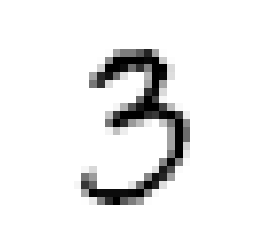

In [7]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[20000]

3.0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')

In [11]:
X_train.shape

(60000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_test.shape

(10000,)

In [15]:
X_test.shape

(10000, 784)

In [16]:
lr_predictions = lr.predict(X_test)

In [17]:
lr_score = lr.score(X_test, y_test)
print (lr_score)

0.913


In [18]:
#evaluate model
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train, y_train, cv=5, scoring="accuracy")

array([ 0.91037068,  0.91760393,  0.91425   ,  0.91114445,  0.91529804])

In [19]:
from sklearn.model_selection import cross_val_predict
lr_train_pred = cross_val_predict(lr, X_train, y_train, cv=5)

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train, lr_train_pred, average='weighted')

0.91356120258549156